In [24]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [25]:
pip install nba_api

## This code sets up data retrieval.

In [26]:
# A list to guide our DataFrame
full_team_list=['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers', 'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder', 'Orlando Magic', 'Portland Trail Blazers', 'Philadelphia 76ers', 'Phoenix Suns', 'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']

pd.set_option('display.max.columns', None)
pd.set_option('display.width', 1000)

# Import the leaguedashteamstats module
from nba_api.stats.endpoints import leaguedashteamstats

# Call the advanced team stats from the 2022-23 season
advStats21_22 = leaguedashteamstats.LeagueDashTeamStats(season='2021-22', per_mode_detailed='Per100Possessions', measure_type_detailed_defense='Advanced')
# Create a DF
advStats2021_2022_df = advStats21_22.get_data_frames()[0]

# Create new DF of only NBA teams
advStatsNBA21_22df = advStats2021_2022_df[advStats2021_2022_df['TEAM_NAME'].isin(full_team_list)].copy()
# Reset the index to join everything later
advStatsNBA21_22df.reset_index(drop=True, inplace=True)

# Focus only on columns relevant to our research
advStatsNBA21_22_cols = [
    'TEAM_NAME',
    'W_PCT',
    'OFF_RATING',
    'DEF_RATING',
    'NET_RATING',
    'AST_PCT',
    'AST_TO',
    'OREB_PCT',
    'DREB_PCT',
    'EFG_PCT',
    'TS_PCT',
    'PACE']

# Create cleaner DF only focusing on certain variables
advStatsNBA21_22df_slim=advStatsNBA21_22df[advStatsNBA21_22_cols].copy()
advStatsNBA21_22df_slim.reset_index(drop=True, inplace=True)
print(advStatsNBA21_22df_slim)

                 TEAM_NAME  W_PCT  OFF_RATING  DEF_RATING  NET_RATING  AST_PCT  AST_TO  OREB_PCT  DREB_PCT  EFG_PCT  TS_PCT    PACE
0            Atlanta Hawks  0.517       114.8       113.5         1.3    0.596    2.02     0.270     0.727    0.542   0.579   98.71
1           Boston Celtics  0.632       113.2       105.6         7.6    0.613    1.80     0.276     0.725    0.543   0.578   97.69
2            Brooklyn Nets  0.540       112.3       111.6         0.8    0.596    1.72     0.287     0.703    0.533   0.571   99.78
3        Charlotte Hornets  0.494       112.8       112.8         0.0    0.654    2.01     0.276     0.703    0.541   0.570  100.63
4            Chicago Bulls  0.552       111.8       112.4        -0.6    0.572    1.82     0.253     0.733    0.535   0.573   99.09
5      Cleveland Cavaliers  0.529       110.5       108.7         1.8    0.631    1.73     0.278     0.720    0.534   0.568   97.04
6         Dallas Mavericks  0.609       111.6       108.8         2.8    0.5

## This code retrieves similar advanced team metrics, but defensively oriented.

In [27]:
# Change the arguments for the defensive perspective
DEFstats21_22 = leaguedashteamstats.LeagueDashTeamStats(season='2021-22', measure_type_detailed_defense='Opponent', per_mode_detailed='Per100Possessions')
DEFstats21_22df = DEFstats21_22.get_data_frames()[0]

# Repeat the process as before
DEFstatsNBA21_22df = DEFstats21_22df[DEFstats21_22df['TEAM_NAME'].isin(full_team_list)].copy()
DEFstatsNBA21_22df.reset_index(drop=True, inplace=True)

DEFstatsNBA21_22_cols = [
    'TEAM_NAME',
    'OPP_FG_PCT',
    'OPP_FG3_PCT',
    'OPP_TOV',
    'OPP_BLK',
    'PLUS_MINUS']

DEFstatsNBA21_22df_slim=DEFstatsNBA21_22df[DEFstatsNBA21_22_cols].copy()
DEFstatsNBA21_22df_slim.reset_index(drop=True, inplace=True)
print(DEFstatsNBA21_22df_slim)

                 TEAM_NAME  OPP_FG_PCT  OPP_FG3_PCT  OPP_TOV  OPP_BLK  PLUS_MINUS
0            Atlanta Hawks       0.468        0.362     13.0      4.5        -1.2
1           Boston Celtics       0.433        0.336     14.2      4.7        -7.6
2            Brooklyn Nets       0.450        0.343     13.6      5.1        -0.6
3        Charlotte Hornets       0.466        0.359     14.9      4.7         0.1
4            Chicago Bulls       0.470        0.360     13.3      5.2         0.5
5      Cleveland Cavaliers       0.450        0.352     13.9      4.8        -1.9
6         Dallas Mavericks       0.456        0.340     13.8      4.1        -2.8
7           Denver Nuggets       0.469        0.348     13.3      4.8        -1.7
8          Detroit Pistons       0.469        0.360     14.7      5.3         7.4
9    Golden State Warriors       0.436        0.338     15.0      4.0        -5.2
10         Houston Rockets       0.480        0.349     14.1      5.9         7.9
11          Indi

In [28]:
# Now we will go to the following season's data just for its win percentage
advStats22_23 = leaguedashteamstats.LeagueDashTeamStats(season='2022-23', per_mode_detailed='Per100Possessions', measure_type_detailed_defense='Advanced')
advStats22_23df = advStats22_23.get_data_frames()[0]

advStatsNBA22_23df = advStats22_23df[advStats22_23df['TEAM_NAME'].isin(full_team_list)].copy()
advStatsNBA22_23df.reset_index(drop=True, inplace=True)

# Pull only the columns we need and repeat the data cleaning process as before
advStatsNBA22_23_cols = [
    'TEAM_NAME',
    'W_PCT']

advStatsNBA22_23df_slim=advStatsNBA22_23df[advStatsNBA22_23_cols].copy()
advStatsNBA22_23df_slim.reset_index(drop=True, inplace=True)
print(advStatsNBA22_23df_slim)



                 TEAM_NAME  W_PCT
0            Atlanta Hawks  0.494
1           Boston Celtics  0.690
2            Brooklyn Nets  0.552
3        Charlotte Hornets  0.333
4            Chicago Bulls  0.506
5      Cleveland Cavaliers  0.621
6         Dallas Mavericks  0.437
7           Denver Nuggets  0.632
8          Detroit Pistons  0.230
9    Golden State Warriors  0.500
10         Houston Rockets  0.276
11          Indiana Pacers  0.425
12             LA Clippers  0.529
13      Los Angeles Lakers  0.533
14       Memphis Grizzlies  0.611
15              Miami Heat  0.522
16         Milwaukee Bucks  0.701
17  Minnesota Timberwolves  0.506
18    New Orleans Pelicans  0.517
19         New York Knicks  0.575
20   Oklahoma City Thunder  0.500
21           Orlando Magic  0.414
22      Philadelphia 76ers  0.644
23            Phoenix Suns  0.552
24  Portland Trail Blazers  0.425
25        Sacramento Kings  0.600
26       San Antonio Spurs  0.264
27         Toronto Raptors  0.517
28            

## Here, we use a separate API for age data.

In [29]:
!pip install opendatasets --quiet
import opendatasets as od
import pandas as pd


od.download("https://www.kaggle.com/datasets/justinas/nba-players-data")


kaggle_df = pd.read_csv("nba-players-data/all_seasons.csv")
kaggle_df_2022 = kaggle_df[kaggle_df['season'] == '2021-22'] ### Average team age for 2022 season
team_age = kaggle_df_2022.groupby('team_abbreviation')['age'].mean().reset_index()
team_names = {
   'ATL': 'Atlanta Hawks',
   'BOS': 'Boston Celtics',
   'BRK': 'Brooklyn Nets',
   'BKN': 'Brooklyn Nets',
   'CHA': 'Charlotte Hornets',
   'CHI': 'Chicago Bulls',
   'CLE': 'Cleveland Cavaliers',
   'DAL': 'Dallas Mavericks',
   'DEN': 'Denver Nuggets',
   'DET': 'Detroit Pistons',
   'GSW': 'Golden State Warriors',
   'HOU': 'Houston Rockets',
   'IND': 'Indiana Pacers',
   'LAC': 'Los Angeles Clippers',
   'LAL': 'Los Angeles Lakers',
   'MEM': 'Memphis Grizzlies',
   'MIA': 'Miami Heat',
   'MIL': 'Milwaukee Bucks',
   'MIN': 'Minnesota Timberwolves',
   'NOP': 'New Orleans Pelicans',
   'NOH': 'New Orleans Hornets',
   'NYK': 'New York Knicks',
   'OKC': 'Oklahoma City Thunder',
   'ORL': 'Orlando Magic',
   'PHI': 'Philadelphia 76ers',
   'PHX': 'Phoenix Suns',
   'POR': 'Portland Trail Blazers',
   'SAC': 'Sacramento Kings',
   'SAS': 'San Antonio Spurs',
   'TOR': 'Toronto Raptors',
   'UTA': 'Utah Jazz',
   'WAS': 'Washington Wizards'
}
team_age['team_name'] = team_age['team_abbreviation'].map(team_names)
team_age = team_age[['team_name', 'age']]
age_df = pd.DataFrame(team_age)
print(age_df)

Skipping, found downloaded files in "./nba-players-data" (use force=True to force download)
                 team_name        age
0            Atlanta Hawks  26.142857
1            Brooklyn Nets  28.470588
2           Boston Celtics  27.227273
3        Charlotte Hornets  25.117647
4            Chicago Bulls  25.650000
5      Cleveland Cavaliers  26.045455
6         Dallas Mavericks  27.095238
7           Denver Nuggets  27.200000
8          Detroit Pistons  24.520000
9    Golden State Warriors  28.250000
10         Houston Rockets  23.812500
11          Indiana Pacers  25.550000
12    Los Angeles Clippers  27.375000
13      Los Angeles Lakers  29.190476
14       Memphis Grizzlies  24.181818
15              Miami Heat  28.000000
16         Milwaukee Bucks  28.315789
17  Minnesota Timberwolves  24.882353
18    New Orleans Pelicans  26.388889
19         New York Knicks  26.380952
20   Oklahoma City Thunder  24.192308
21           Orlando Magic  24.571429
22      Philadelphia 76ers  26.421

## Now that we have all data, we can make a master DataFrame.

In [30]:
# This will create a single DF joined by the shared column (team name)
NBA21_22 = pd.merge(advStatsNBA21_22df_slim, DEFstatsNBA21_22df_slim, on='TEAM_NAME', how='left')
NBA21_22['Average Age']=age_df['age']
NBA21_22['W_PCT_2023']=advStatsNBA22_23df_slim['W_PCT']
print(NBA21_22)

                 TEAM_NAME  W_PCT  OFF_RATING  DEF_RATING  NET_RATING  AST_PCT  AST_TO  OREB_PCT  DREB_PCT  EFG_PCT  TS_PCT    PACE  OPP_FG_PCT  OPP_FG3_PCT  OPP_TOV  OPP_BLK  PLUS_MINUS  Average Age  W_PCT_2023
0            Atlanta Hawks  0.517       114.8       113.5         1.3    0.596    2.02     0.270     0.727    0.542   0.579   98.71       0.468        0.362     13.0      4.5        -1.2    26.142857       0.494
1           Boston Celtics  0.632       113.2       105.6         7.6    0.613    1.80     0.276     0.725    0.543   0.578   97.69       0.433        0.336     14.2      4.7        -7.6    28.470588       0.690
2            Brooklyn Nets  0.540       112.3       111.6         0.8    0.596    1.72     0.287     0.703    0.533   0.571   99.78       0.450        0.343     13.6      5.1        -0.6    27.227273       0.552
3        Charlotte Hornets  0.494       112.8       112.8         0.0    0.654    2.01     0.276     0.703    0.541   0.570  100.63       0.466        0

## We analyze the correlation between the variables we gathered and next season's winrate.

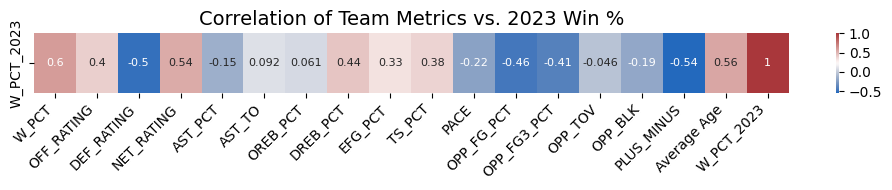

In [31]:
# The matrix can't run a correlation between the variables unless all columns are numeric

NBA21_22_numeric = NBA21_22.select_dtypes(include=['number'])
matrix = NBA21_22_numeric.corr()

plt.figure(figsize=(10, 2))

# This makes sure we only see the correlation between the variables and next season's winrate
sns.heatmap(matrix.loc[['W_PCT_2023']], annot=True, annot_kws={'size': 8}, cmap='vlag')

# This makes it so the variable names don't overlap
plt.xticks(rotation=45, ha='right')

plt.title('Correlation of Team Metrics vs. 2023 Win %', fontsize=14)

plt.tight_layout()

plt.show()

## Graps help visualize this correlation for some of the variables with the strongest values

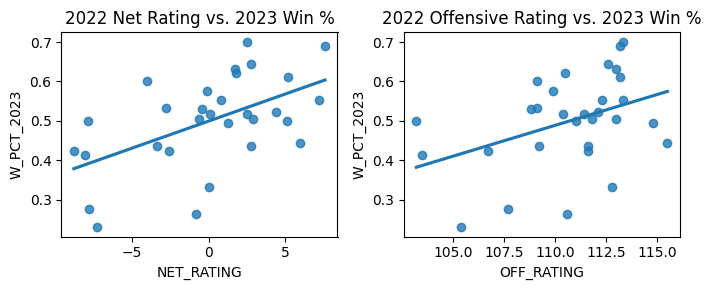

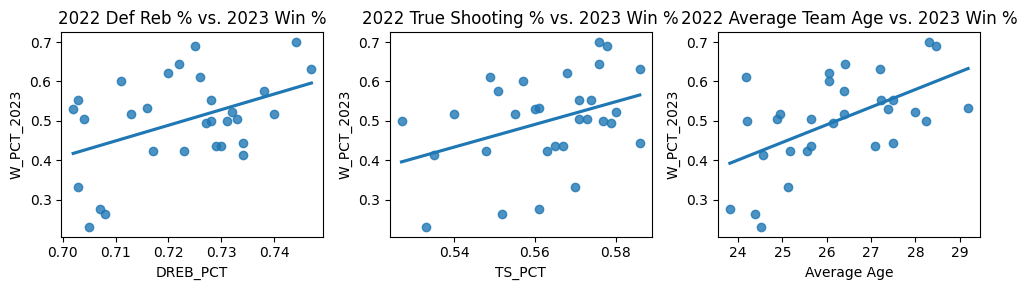

In [32]:
# Make a figure with subplots to compare the plots of different variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
sns.regplot(data=NBA21_22, x='NET_RATING', y='W_PCT_2023', ax=axes[0], ci=None)
axes[0].set_title('2022 Net Rating vs. 2023 Win %')
sns.regplot(data=NBA21_22, x='OFF_RATING', y='W_PCT_2023', ax=axes[1], ci=None)
axes[1].set_title('2022 Offensive Rating vs. 2023 Win %')

plt.tight_layout()
plt.show()

# Grouping the ratings above and the more individual stats below
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
sns.regplot(data=NBA21_22, x='DREB_PCT', y='W_PCT_2023', ax=axes[0], ci=None)
axes[0].set_title('2022 Def Reb % vs. 2023 Win %')
sns.regplot(data=NBA21_22, x='TS_PCT', y='W_PCT_2023', ax=axes[1], ci=None)
axes[1].set_title('2022 True Shooting % vs. 2023 Win %')
sns.regplot(data=NBA21_22, x='Average Age', y='W_PCT_2023', ax=axes[2], ci=None)
axes[2].set_title('2022 Average Team Age vs. 2023 Win %')

plt.tight_layout()
plt.show()

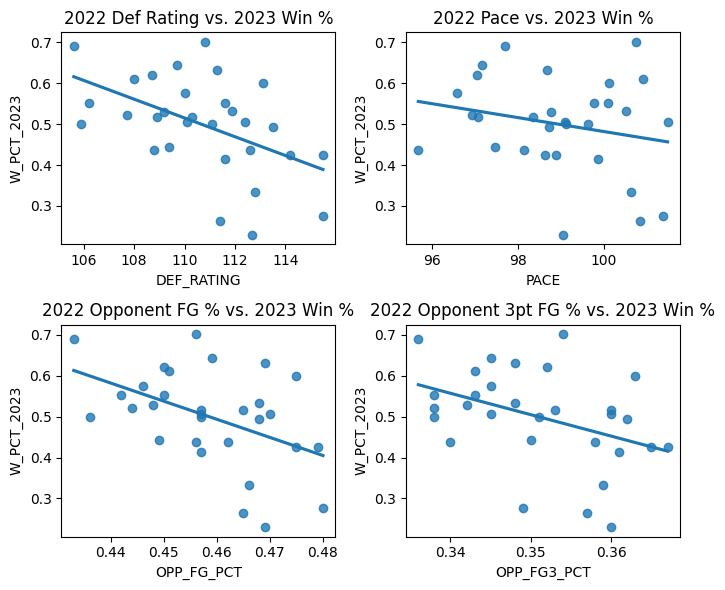

In [33]:
# Here we do the same thing as above, but with more defensively minded stats instead
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))
sns.regplot(data=NBA21_22, x='DEF_RATING', y='W_PCT_2023', ax=axes[0,0], ci=None)
axes[0,0].set_title('2022 Def Rating vs. 2023 Win %')
sns.regplot(data=NBA21_22, x='PACE', y='W_PCT_2023', ax=axes[0,1], ci=None)
axes[0,1].set_title('2022 Pace vs. 2023 Win %')
sns.regplot(data=NBA21_22, x='OPP_FG_PCT', y='W_PCT_2023', ax=axes[1,0], ci=None)
axes[1,0].set_title('2022 Opponent FG % vs. 2023 Win %')
sns.regplot(data=NBA21_22, x='OPP_FG3_PCT', y='W_PCT_2023', ax=axes[1,1], ci=None)
axes[1,1].set_title('2022 Opponent 3pt FG % vs. 2023 Win %')

plt.tight_layout()
plt.show()

## These "interactions" hope to have a higher correlation to next season's winrate than any individual variable and are added as new columns to our DF.

In [34]:
# All these interactions are simply being added to the master DF
# These interactions are leveraging already existing variable data and combining them
NBA21_22['Interaction_1']=NBA21_22['TS_PCT']*NBA21_22['DREB_PCT']
NBA21_22['Interaction_2']=1/(NBA21_22['PACE']*NBA21_22['OPP_FG_PCT'])
NBA21_22['Interaction_3']= (NBA21_22['TS_PCT']*NBA21_22['DREB_PCT'])/NBA21_22['OPP_FG_PCT']
NBA21_22['Interaction_4']=NBA21_22['Average Age']/NBA21_22['PLUS_MINUS']
NBA21_22['Interaction_5'] = NBA21_22['AST_PCT'] * NBA21_22['EFG_PCT']
NBA21_22['Interaction_6'] = NBA21_22['DREB_PCT'] * NBA21_22['OPP_TOV']
NBA21_22['Interaction_7'] = NBA21_22['OREB_PCT'] * NBA21_22['TS_PCT']
NBA21_22['Interaction_8'] = NBA21_22['AST_TO'] / NBA21_22['PACE']
NBA21_22['Interaction_9'] = NBA21_22['Average Age'] * NBA21_22['AST_TO']
NBA21_22['Interaction_10'] = (1 - NBA21_22['OPP_FG3_PCT']) / (NBA21_22['OPP_BLK'] + 1)
NBA21_22['Interaction_11'] = NBA21_22['W_PCT'] * NBA21_22['Average Age']
NBA21_22['Interaction_12'] = NBA21_22['NET_RATING'] * NBA21_22['AST_TO']
NBA21_22['Interaction_13'] = (NBA21_22['DREB_PCT']*NBA21_22['TS_PCT'])/NBA21_22['DEF_RATING']
NBA21_22['Interaction_14'] = NBA21_22['DREB_PCT']/NBA21_22['DEF_RATING']
NBA21_22['Interaction_15'] = NBA21_22['AST_PCT']/NBA21_22['PLUS_MINUS']
NBA21_22['Interaction_16'] = NBA21_22['W_PCT'] * NBA21_22['AST_TO']
NBA21_22['Interaction_17'] = NBA21_22['TS_PCT'] / NBA21_22['OPP_FG3_PCT']
NBA21_22['Interaction_18'] = (NBA21_22['OPP_BLK'] / NBA21_22['DEF_RATING'] * NBA21_22['OPP_TOV'])
NBA21_22['Interaction_19'] = NBA21_22['OREB_PCT'] / NBA21_22['OPP_FG_PCT']
NBA21_22['Interaction_20'] = NBA21_22['Average Age'] * NBA21_22['PACE']


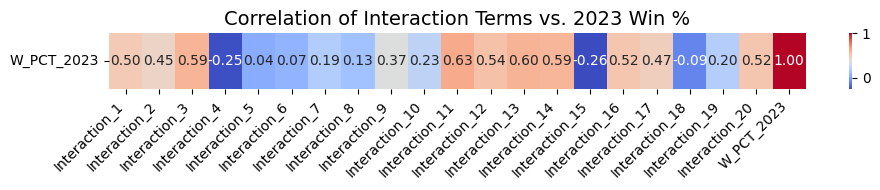

In [35]:
# Here we are setting up for a correlation matrix for only the interactions
interactions_to_correlate = [
    'Interaction_1',
    'Interaction_2',
    'Interaction_3',
    'Interaction_4',
    'Interaction_5',
    'Interaction_6',
    'Interaction_7',
    'Interaction_8',
    'Interaction_9',
    'Interaction_10',
    'Interaction_11',
    'Interaction_12',
    'Interaction_13',
    'Interaction_14',
    'Interaction_15',
    'Interaction_16',
    'Interaction_17',
    'Interaction_18',
    'Interaction_19',
    'Interaction_20',
    'W_PCT_2023'
]
# This makes a separate DF of only the interactions and next season's data
interaction_df = NBA21_22[interactions_to_correlate]
corr_matrix = interaction_df.corr()

plt.figure(figsize=(10, 2))

sns.heatmap(
    corr_matrix.loc[['W_PCT_2023']],
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
)

plt.title('Correlation of Interaction Terms vs. 2023 Win %', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## To segment the data, we will examine the eastern and western conferences individually.

In [36]:
# We will use these lists to segment the DF by conference
east_teams = [
    'Atlanta Hawks',
    'Boston Celtics',
    'Brooklyn Nets',
    'Charlotte Hornets',
    'Chicago Bulls',
    'Cleveland Cavaliers',
    'Detroit Pistons',
    'Indiana Pacers',
    'Miami Heat',
    'Milwaukee Bucks',
    'New York Knicks',
    'Orlando Magic',
    'Philadelphia 76ers',
    'Toronto Raptors',
    'Washington Wizards'
]

west_teams = [
    'Dallas Mavericks',
    'Denver Nuggets',
    'Golden State Warriors',
    'Houston Rockets',
    'LA Clippers',
    'Los Angeles Lakers',
    'Memphis Grizzlies',
    'Minnesota Timberwolves',
    'New Orleans Pelicans',
    'Oklahoma City Thunder',
    'Phoenix Suns',
    'Portland Trail Blazers',
    'Sacramento Kings',
    'San Antonio Spurs',
    'Utah Jazz'
]

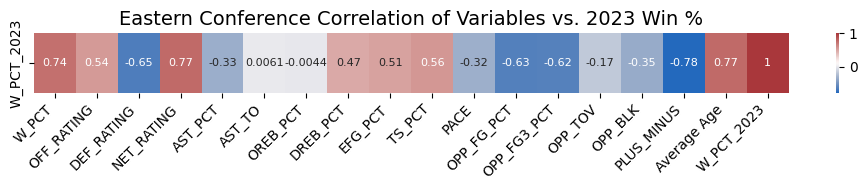

In [37]:
# If the column team name is in the list of eastern teams, they join the east DF
east_df = NBA21_22[NBA21_22['TEAM_NAME'].isin(east_teams)].copy()
# Similar for the west
west_df = NBA21_22[NBA21_22['TEAM_NAME'].isin(west_teams)].copy()

# First, we want a cleaner DF that only houses the non-interaction columns
non_interaction_columns = [
    'W_PCT',
    'OFF_RATING',
    'DEF_RATING',
    'NET_RATING',
    'AST_PCT',
    'AST_TO',
    'OREB_PCT',
    'DREB_PCT',
    'EFG_PCT',
    'TS_PCT',
    'PACE',
    'OPP_FG_PCT',
    'OPP_FG3_PCT',
    'OPP_TOV',
    'OPP_BLK',
    'PLUS_MINUS',
    'Average Age',
    'W_PCT_2023'
]

# We can make individual heatmaps for the east and west respectively
matrix_east = east_df[non_interaction_columns].corr()

plt.figure(figsize=(10,2))
sns.heatmap(matrix_east.loc[['W_PCT_2023']], annot=True, annot_kws={'size': 8}, cmap='vlag')
plt.xticks(rotation=45, ha='right')
plt.title('Eastern Conference Correlation of Variables vs. 2023 Win %', fontsize=14)
plt.tight_layout()
plt.show()


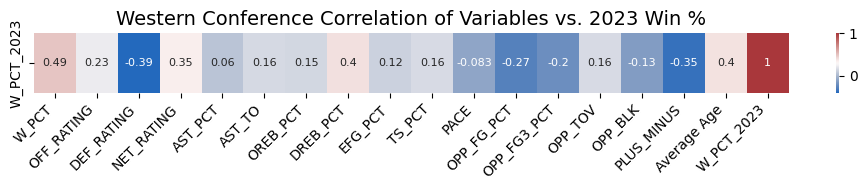

In [38]:
matrix_west = west_df[non_interaction_columns].corr()


plt.figure(figsize=(10,2))
sns.heatmap(matrix_west.loc[['W_PCT_2023']], annot=True, annot_kws={'size': 8}, cmap='vlag')
plt.xticks(rotation=45, ha='right')
plt.title('Western Conference Correlation of Variables vs. 2023 Win %', fontsize=14)
plt.tight_layout()
plt.show()

## This code sorts by order of magnitude the variables whose correlation values differ the most between each conference.

In [39]:
# This takes the absolute value of the difference between the correlations in the east and west
correlations_east = matrix_east.loc['W_PCT_2023']
correlations_west = matrix_west.loc['W_PCT_2023']
abs_difference = (correlations_east - correlations_west).abs()
print("\n--- ABSOLUTE DIFFERENCE (Sorted) ---")
# We are sorting them in descending order so we can see them from greatest to least in order of magnitude
print(abs_difference.sort_values(ascending=False))


--- ABSOLUTE DIFFERENCE (Sorted) ---
PLUS_MINUS     0.426895
OPP_FG3_PCT    0.424483
NET_RATING     0.416905
TS_PCT         0.399401
AST_PCT        0.390847
EFG_PCT        0.390216
Average Age    0.374548
OPP_FG_PCT     0.355385
OPP_TOV        0.330018
OFF_RATING     0.313876
DEF_RATING     0.255145
W_PCT          0.247701
PACE           0.238621
OPP_BLK        0.221350
OREB_PCT       0.150023
AST_TO         0.149120
DREB_PCT       0.072181
W_PCT_2023     0.000000
Name: W_PCT_2023, dtype: float64


## These overlaid plots help visualize this difference across conferences

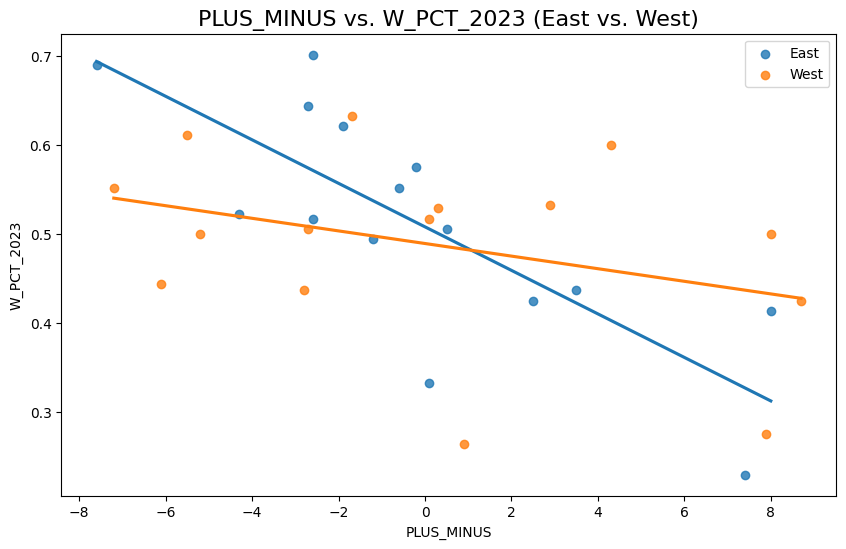

In [40]:
# Here we can plot these values on the same figure, but from two different sets of data (east and west)
# This helps highlight the difference between the two conferences

var_to_plot = 'PLUS_MINUS'
target = 'W_PCT_2023'

fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(data=east_df,
            x=var_to_plot,
            y=target,
            ax=ax,
            ci=None,
            label='East')

sns.regplot(data=west_df,
            x=var_to_plot,
            y=target,
            ax=ax,
            ci=None,
            label='West')

ax.set_title(f'{var_to_plot} vs. {target} (East vs. West)', fontsize=16)
ax.legend()
plt.show()

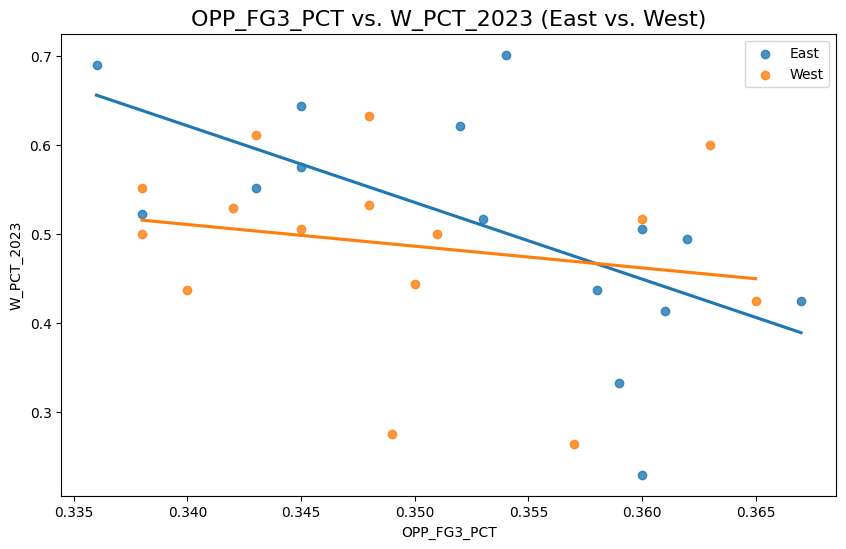

In [41]:
# The same is done here, but with a different variable
var_to_plot = 'OPP_FG3_PCT'
target = 'W_PCT_2023'

fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(data=east_df,
            x=var_to_plot,
            y=target,
            ax=ax,
            ci=None,
            label='East')

sns.regplot(data=west_df,
            x=var_to_plot,
            y=target,
            ax=ax,
            ci=None,
            label='West')

ax.set_title(f'{var_to_plot} vs. {target} (East vs. West)', fontsize=16)
ax.legend()
plt.show()

## We can also look at how our interactions differ across conferences

In [42]:
# This is exactly the same as our code from earlier, but now the interactions only use the data from the respective east and west DFs
east_df['Interaction_1']=east_df['TS_PCT']*east_df['DREB_PCT']
east_df['Interaction_2']=1/(east_df['PACE']*east_df['OPP_FG_PCT'])
east_df['Interaction_3']= (east_df['TS_PCT']*east_df['DREB_PCT'])/east_df['OPP_FG_PCT']
east_df['Interaction_4']=east_df['Average Age']/east_df['PLUS_MINUS']
east_df['Interaction_5'] = east_df['AST_PCT'] * east_df['EFG_PCT']
east_df['Interaction_6'] = east_df['DREB_PCT'] * east_df['OPP_TOV']
east_df['Interaction_7'] = east_df['OREB_PCT'] * east_df['TS_PCT']
east_df['Interaction_8'] = east_df['AST_TO'] / east_df['PACE']
east_df['Interaction_9'] = east_df['Average Age'] * east_df['AST_TO']
east_df['Interaction_10'] = (1 - east_df['OPP_FG3_PCT']) / (east_df['OPP_BLK'] + 1)
east_df['Interaction_11'] = east_df['W_PCT'] * east_df['Average Age']
east_df['Interaction_12'] = east_df['NET_RATING'] * east_df['AST_TO']
east_df['Interaction_13'] = (east_df['DREB_PCT']*east_df['TS_PCT'])/east_df['DEF_RATING']
east_df['Interaction_14'] = east_df['DREB_PCT']/east_df['DEF_RATING']
east_df['Interaction_15'] = east_df['AST_PCT']/east_df['PLUS_MINUS']
east_df['Interaction_16'] = east_df['W_PCT'] * east_df['AST_TO']
east_df['Interaction_17'] = east_df['TS_PCT'] / east_df['OPP_FG3_PCT']
east_df['Interaction_18'] = (east_df['OPP_BLK'] / east_df['DEF_RATING'] * east_df['OPP_TOV'])
east_df['Interaction_19'] = east_df['OREB_PCT'] / east_df['OPP_FG_PCT']
east_df['Interaction_20'] = east_df['Average Age'] * east_df['PACE']

west_df['Interaction_1']=west_df['TS_PCT']*west_df['DREB_PCT']
west_df['Interaction_2']=1/(west_df['PACE']*west_df['OPP_FG_PCT'])
west_df['Interaction_3']= (west_df['TS_PCT']*west_df['DREB_PCT'])/west_df['OPP_FG_PCT']
west_df['Interaction_4']=west_df['Average Age']/west_df['PLUS_MINUS']
west_df['Interaction_5'] = west_df['AST_PCT'] * west_df['EFG_PCT']
west_df['Interaction_6'] = west_df['DREB_PCT'] * west_df['OPP_TOV']
west_df['Interaction_7'] = west_df['OREB_PCT'] * west_df['TS_PCT']
west_df['Interaction_8'] = west_df['AST_TO'] / west_df['PACE']
west_df['Interaction_9'] = west_df['Average Age'] * west_df['AST_TO']
west_df['Interaction_10'] = (1 - west_df['OPP_FG3_PCT']) / (west_df['OPP_BLK'] + 1)
west_df['Interaction_11'] = west_df['W_PCT'] * west_df['Average Age']
west_df['Interaction_12'] = west_df['NET_RATING'] * west_df['AST_TO']
west_df['Interaction_13'] = (west_df['DREB_PCT']*west_df['TS_PCT'])/west_df['DEF_RATING']
west_df['Interaction_14'] = west_df['DREB_PCT']/west_df['DEF_RATING']
west_df['Interaction_15'] = west_df['AST_PCT']/west_df['PLUS_MINUS']
west_df['Interaction_16'] = west_df['W_PCT'] * west_df['AST_TO']
west_df['Interaction_17'] = west_df['TS_PCT'] / west_df['OPP_FG3_PCT']
west_df['Interaction_18'] = (west_df['OPP_BLK'] / west_df['DEF_RATING'] * west_df['OPP_TOV'])
west_df['Interaction_19'] = west_df['OREB_PCT'] / west_df['OPP_FG_PCT']
west_df['Interaction_20'] = west_df['Average Age'] * west_df['PACE']


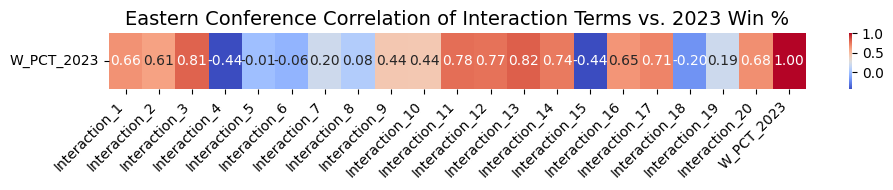

In [43]:
# Creating the same correlation heatmap as above
east_interactions_to_correlate = [
    'Interaction_1',
    'Interaction_2',
    'Interaction_3',
    'Interaction_4',
    'Interaction_5',
    'Interaction_6',
    'Interaction_7',
    'Interaction_8',
    'Interaction_9',
    'Interaction_10',
    'Interaction_11',
    'Interaction_12',
    'Interaction_13',
    'Interaction_14',
    'Interaction_15',
    'Interaction_16',
    'Interaction_17',
    'Interaction_18',
    'Interaction_19',
    'Interaction_20',
    'W_PCT_2023'
]
east_interaction_df = east_df[interactions_to_correlate]
corr_matrix = east_interaction_df.corr()

plt.figure(figsize=(10, 2))

sns.heatmap(
    corr_matrix.loc[['W_PCT_2023']],
    annot=True,
    fmt='.2f',
    cmap='coolwarm',)

plt.title('Eastern Conference Correlation of Interaction Terms vs. 2023 Win %', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

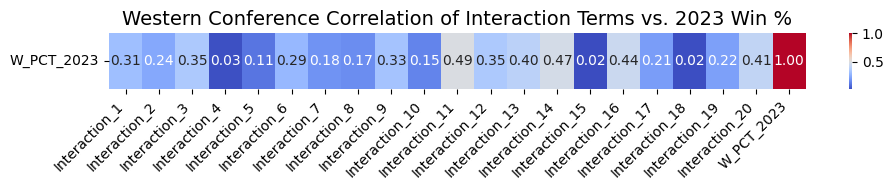

In [44]:
# Creating the correlation heatmap for the western conference
west_interactions_to_correlate = [
    'Interaction_1',
    'Interaction_2',
    'Interaction_3',
    'Interaction_4',
    'Interaction_5',
    'Interaction_6',
    'Interaction_7',
    'Interaction_8',
    'Interaction_9',
    'Interaction_10',
    'Interaction_11',
    'Interaction_12',
    'Interaction_13',
    'Interaction_14',
    'Interaction_15',
    'Interaction_16',
    'Interaction_17',
    'Interaction_18',
    'Interaction_19',
    'Interaction_20',
    'W_PCT_2023'
]
west_interaction_df = west_df[interactions_to_correlate]
corr_matrix = west_interaction_df.corr()

plt.figure(figsize=(10, 2))

sns.heatmap(
    corr_matrix.loc[['W_PCT_2023']],
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
)

plt.title('Western Conference Correlation of Interaction Terms vs. 2023 Win %', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## These are the 3 best performing interactions, but we want to choose the one with less spread so we will examine their graphs.

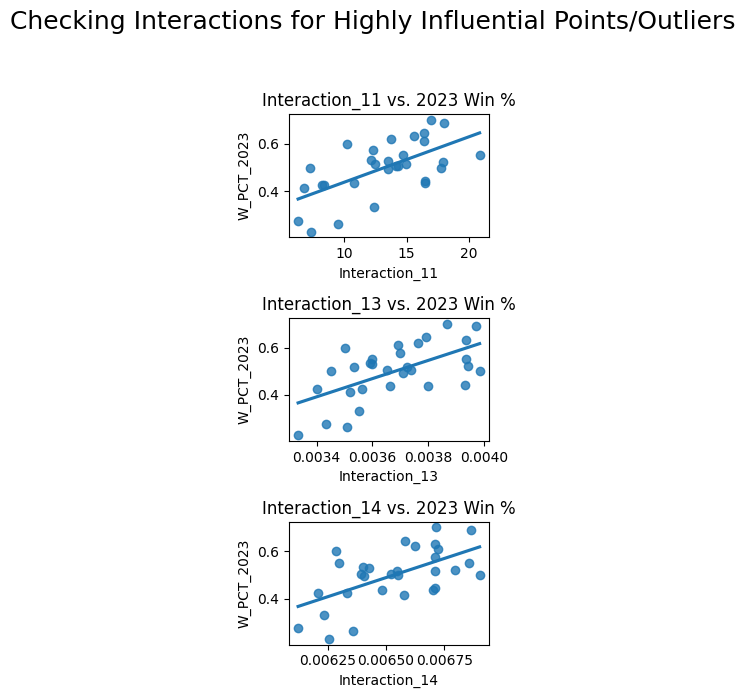

In [45]:
# We can make a figure with a master title to visualize the spread of these different inteactions
# Each is on its own row and is titlted
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3,7))
fig.suptitle(
    "Checking Interactions for Highly Influential Points/Outliers",
    fontsize=18,
    # This makes sure our title does not conflict with the plot at all
    y=1.02)

var1 = 'Interaction_11'
ax1 = axes[0]
sns.regplot(data=NBA21_22, x=var1, y='W_PCT_2023', ax=ax1, ci=None)
ax1.set_title(f'{var1} vs. 2023 Win %')

var2 = 'Interaction_13'
ax2 = axes[1]
sns.regplot(data=NBA21_22, x=var2, y='W_PCT_2023', ax=ax2, ci=None)
ax2.set_title(f'{var2} vs. 2023 Win %')

var3 = 'Interaction_14'
ax3 = axes[2]
sns.regplot(data=NBA21_22, x=var3, y='W_PCT_2023', ax=ax3, ci=None)
ax3.set_title(f'{var3} vs. 2023 Win %')


plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## Now we can use our chosen interaction on an older season to predict the subsequent season's top contenders.

In [46]:
# Call the advanced team stats from the 2017-18 season
advStats17_18 = leaguedashteamstats.LeagueDashTeamStats(season='2017-18', per_mode_detailed='Per100Possessions', measure_type_detailed_defense='Advanced')
# Create a DF
advStats2017_2018_df = advStats17_18.get_data_frames()[0]

# Create new DF of only NBA teams
advStatsNBA17_18df = advStats2017_2018_df[advStats2017_2018_df['TEAM_NAME'].isin(full_team_list)].copy()
# Reset the index
advStatsNBA17_18df.reset_index(drop=True, inplace=True)

advStatsNBA17_18_cols = [
    'TEAM_NAME',
    'DEF_RATING',
    'DREB_PCT',
    'TS_PCT']

# Create cleaner DF only focusing on certain variables
advStatsNBA17_18df_slim=advStatsNBA17_18df[advStatsNBA17_18_cols].copy()
advStatsNBA17_18df_slim.reset_index(drop=True, inplace=True)

advStatsNBA17_18df_slim['Interaction_13'] = (advStatsNBA17_18df_slim['DREB_PCT']*advStatsNBA17_18df_slim['TS_PCT'])/advStatsNBA17_18df_slim['DEF_RATING']

# From the above DF, we make variables that house the east and west teams respectively
# These variables are sorted in descending order
east_17_18 = advStatsNBA17_18df_slim[advStatsNBA17_18df_slim['TEAM_NAME'].isin(east_teams)].sort_values(
    by='Interaction_13', ascending=False)

west_17_18 = advStatsNBA17_18df_slim[advStatsNBA17_18df_slim['TEAM_NAME'].isin(west_teams)].sort_values(
    by='Interaction_13', ascending=False)

# Print the results
# Only the first 8 results are printed thanks to indexing
print("Predicted Next Season's Eastern Conference Top 8")
print()
print(east_17_18['TEAM_NAME'][0:8])
print()
print("Predicted Next Season's Western Conference Top 8")
print()
print(west_17_18['TEAM_NAME'][0:8])



Predicted Next Season's Eastern Conference Top 8

22     Philadelphia 76ers
27        Toronto Raptors
1          Boston Celtics
15             Miami Heat
3       Charlotte Hornets
5     Cleveland Cavaliers
29     Washington Wizards
8         Detroit Pistons
Name: TEAM_NAME, dtype: object

Predicted Next Season's Western Conference Top 8

10           Houston Rockets
28                 Utah Jazz
9      Golden State Warriors
24    Portland Trail Blazers
18      New Orleans Pelicans
26         San Antonio Spurs
7             Denver Nuggets
6           Dallas Mavericks
Name: TEAM_NAME, dtype: object


Actual Eastern Results:

1. Bucks, 2. Raptors, 3. 76ers, 4. Celtics, 5. Pacers, 6. Nets, 7. Magic, 8. Pistons

Included 4/8 teams correctly.

Incorrect: Heat, Hornets, Cavs, Wizards

Missing: Bucks, Pacers, Nets, Magic

Actual Western Results:

1. Warriors, 2. Nuggets, 3. Trail Blazers, 4. Rockets, 5. Jazz, 6. Thunder, 7. Spurs, 8. Clippers

Included 6/8 teams correctly.

Incorrect: Pelicans, Mavericks

Missing: Thunder, Clippers